In [1]:
import numpy as np
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
import random


import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


PREPARED_DATASET_PATH = 'Desktop\Kurs_project_task/test.csv'
SCALER_FILE_PATH = 'Kornienko_Irina_model.pkl'
MODEL_FILE_PATH = 'Kornienko_Irina_scaler.pkl'


def evaluate_preds(true_val, pred_val):
    print('R2:\t' + str(round(r2(true_val, pred_val), 3)) + '\n' +
         'MAE:\t' + str(round(mae(true_val, pred_val), 3)) + '\n' + 
         'MSE:\t' + str(round(mse(true_val, pred_val), 3)))
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_val, y = true_val)
    
    plt.xlabel('Predict values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [2]:
test_df = pd.read_csv(PREPARED_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [3]:
train_df = pd.read_csv('Desktop\Kurs_project_task/train.csv')

In [4]:
train_df


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


# I. ПОДГОТОВКА МАССИВА ДЛЯ ТЕСТИРОВАНИЯ ПО МАТЕРИАЛАМ  3 урока

In [5]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [6]:
train_df['Id'] = train_df['Id'].astype(float)
train_df['DistrictId'] = train_df['DistrictId'].astype(float)
train_df['Floor'] = train_df['Floor'].astype(float)
train_df['HouseYear'] = train_df['HouseYear'].astype(float)
train_df['HouseFloor'] = train_df['HouseFloor'].astype(float)
train_df['Social_1'] = train_df['Social_1'].astype(float)
train_df['Social_2'] = train_df['Social_2'].astype(float)
train_df['Social_3'] = train_df['Social_3'].astype(float)
train_df['Helthcare_2'] = train_df['Helthcare_2'].astype(float)
train_df['Shops_1'] = train_df['Shops_1'].astype(float)


In [7]:
# train_df['Id'].dtype
train_df['DistrictId'].dtype
# train_df['Social_3'].dtype

dtype('float64')

# Обзор количественных переменных

In [8]:
df_num = train_df.select_dtypes(include = 'float64')
df_num.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038.0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33.0,7976.0,5.0,NaN,0.0,11.0,184966.930730
1,15053.0,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46.0,10309.0,1.0,240.0,1.0,16.0,300009.450063
2,4765.0,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,34.0,7759.0,0.0,229.0,1.0,3.0,220925.908524
3,5809.0,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23.0,5735.0,3.0,1084.0,0.0,5.0,175616.227217
4,10783.0,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35.0,5776.0,1.0,2078.0,2.0,4.0,150226.531644


In [9]:
df_num.mean()

Id                 8383.407700
DistrictId           50.400800
Rooms                 1.890500
Square               56.315775
LifeSquare           37.199645
KitchenSquare         6.273300
Floor                 8.526700
HouseFloor           12.609400
HouseYear          3990.166300
Ecology_1             0.118858
Social_1             24.687000
Social_2           5352.157400
Social_3              8.039200
Healthcare_1       1142.904460
Helthcare_2           1.319500
Shops_1               4.231300
Price            214138.857399
dtype: float64

In [10]:
df_num.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Обзор номинативных признаков 

In [11]:
df_ob = train_df.select_dtypes(include = 'object')
df_ob.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [12]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [13]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Обработка пропусков


In [15]:
train_df['LifeSquare'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8        True
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23       True
24      False
25       True
26      False
27       True
28      False
29      False
        ...  
9970    False
9971    False
9972     True
9973    False
9974    False
9975     True
9976     True
9977    False
9978     True
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985     True
9986     True
9987     True
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994     True
9995    False
9996    False
9997     True
9998    False
9999    False
Name: LifeSquare, Length: 10000, dtype: bool

In [16]:
train_df['Healthcare_1'].isnull()

0        True
1       False
2       False
3       False
4       False
5       False
6        True
7        True
8        True
9        True
10      False
11       True
12       True
13      False
14       True
15      False
16       True
17       True
18      False
19       True
20      False
21       True
22       True
23      False
24      False
25       True
26       True
27       True
28       True
29       True
        ...  
9970    False
9971     True
9972    False
9973    False
9974    False
9975     True
9976    False
9977    False
9978     True
9979    False
9980     True
9981    False
9982    False
9983    False
9984    False
9985     True
9986     True
9987     True
9988    False
9989     True
9990    False
9991    False
9992     True
9993     True
9994     True
9995    False
9996     True
9997     True
9998    False
9999    False
Name: Healthcare_1, Length: 10000, dtype: bool

In [17]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare']=train_df['LifeSquare'].median()

In [18]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1']=train_df['Healthcare_1'].median()

# Преобразуем категориальные признаки в несколько бинарных

In [19]:
train_df=pd.get_dummies(train_df)

In [20]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038.0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,900.0,0.0,11.0,184966.930730,0,1,0,1,0,1
1,15053.0,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,240.0,1.0,16.0,300009.450063,0,1,0,1,0,1
2,4765.0,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,...,229.0,1.0,3.0,220925.908524,0,1,0,1,0,1
3,5809.0,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,1084.0,0.0,5.0,175616.227217,0,1,0,1,0,1
4,10783.0,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,2078.0,2.0,4.0,150226.531644,0,1,0,1,0,1


# Исключаем столюец ID

In [21]:
train_df = train_df.drop('Id', axis = 1)

In [22]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,...,1026.358900,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,...,746.662828,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,...,830.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,...,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,...,990.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Преобразуем Новые dummi переменные из типа uint8 в float64

In [23]:
# Ecology_2_A        uint8
# Ecology_2_B        uint8
# Ecology_3_A        uint8
# Ecology_3_B        uint8
# Shops_2_A          uint8
# Shops_2_B          uint8

# train_df['Ecology_2_A'] = train_df['Ecology_2_A'].astype(float)
# train_df['Ecology_2_B'] = train_df['Ecology_2_B'].astype(float)
# train_df['Ecology_3_A'] = train_df['Ecology_3_A'].astype(float)
# train_df['Ecology_3_B'] = train_df['Ecology_3_B'].astype(float)
# train_df['Shops_2_A'] = train_df['Shops_2_A'].astype(float)
# train_df['Shops_2_B'] = train_df['Shops_2_B'].astype(float)                                   

In [24]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33.0,...,900.0,0.0,11.0,184966.930730,0,1,0,1,0,1
1,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46.0,...,240.0,1.0,16.0,300009.450063,0,1,0,1,0,1
2,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,34.0,...,229.0,1.0,3.0,220925.908524,0,1,0,1,0,1
3,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23.0,...,1084.0,0.0,5.0,175616.227217,0,1,0,1,0,1
4,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35.0,...,2078.0,2.0,4.0,150226.531644,0,1,0,1,0,1


# ОБРАБОТКА ВЫБРОСОВ МАССИВА TRAIN


In [25]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = 1

In [26]:
train_df['Floor'].mean()

8.5267

In [27]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [28]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, 8))

In [29]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [30]:
train_df['HouseYear'].max()

2020.0

In [31]:
train_df['HouseFloor'].min()

1.0

# I.A Подготовка и очиства данных для test массива по аналогии с трейн

In [32]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [33]:
test_df['Id'] = test_df['Id'].astype(float)
test_df['DistrictId'] = test_df['DistrictId'].astype(float)
test_df['Floor'] = test_df['Floor'].astype(float)
test_df['HouseYear'] = test_df['HouseYear'].astype(float)
test_df['Social_1'] = test_df['Social_1'].astype(float)
test_df['Social_2'] = test_df['Social_2'].astype(float)
test_df['Social_3'] = test_df['Social_3'].astype(float)
test_df['Helthcare_2'] = test_df['Helthcare_2'].astype(float)
test_df['Shops_1'] = test_df['Shops_1'].astype(float)
test_df['HouseFloor'] = test_df['HouseFloor'].astype(float)

# Обзор количественных переменных

In [34]:
df_num_TEST = test_df.select_dtypes(include = 'float64')
df_num_TEST.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,725.0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,11.0,2748.0,1.0,NaN,0.0,0.0
1,15856.0,74.0,2.0,69.263183,NaN,1.0,6.0,1.0,1977.0,0.075779,6.0,1437.0,3.0,NaN,0.0,2.0
2,5480.0,190.0,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,30.0,7538.0,87.0,4702.0,5.0,5.0
3,15664.0,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,23.0,4583.0,3.0,NaN,3.0,3.0
4,14275.0,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,2.0,629.0,1.0,NaN,0.0,0.0


In [35]:
df_num_TEST.mean()

Id               8412.595400
DistrictId         51.279200
Rooms               1.910000
Square             56.449500
LifeSquare         36.158810
KitchenSquare       5.976800
Floor               8.632000
HouseFloor         12.601000
HouseYear        1984.392600
Ecology_1           0.119874
Social_1           24.933800
Social_2         5406.900000
Social_3            8.262600
Healthcare_1     1146.657263
Helthcare_2         1.319400
Shops_1             4.242800
dtype: float64

In [36]:
df_num_TEST.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


# Обзор номинативных признаков

In [37]:
df_ob_TEST = test_df.select_dtypes(include = 'object')
df_ob_TEST.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,A


In [38]:
test_df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [39]:
test_df['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [40]:
test_df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

# Обработка пропусков массива test

In [41]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare']=test_df['LifeSquare'].median()

In [42]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1']=test_df['Healthcare_1'].median()

# Преобразуем категориальные признаки в несколько бинарных в массиве TEST

In [43]:
test_df=pd.get_dummies(test_df)

In [44]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725.0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,...,1.0,900.0,0.0,0.0,0,1,0,1,0,1
1,15856.0,74.0,2.0,69.263183,32.925087,1.0,6.0,1.0,1977.0,0.075779,...,3.0,900.0,0.0,2.0,0,1,0,1,0,1
2,5480.0,190.0,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,...,87.0,4702.0,5.0,5.0,0,1,0,1,0,1
3,15664.0,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,...,3.0,900.0,3.0,3.0,0,1,0,1,0,1
4,14275.0,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,...,1.0,900.0,0.0,0.0,0,1,0,1,1,0


# Исключаем столбец ID

In [45]:
test_df = test_df.drop('Id', axis = 1)

In [46]:
test_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,...,8.262600,1029.396400,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,...,23.863762,766.595258,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,...,0.000000,810.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,...,2.000000,900.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,...,5.000000,990.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,...,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Преобразуем dummy переменные в формат float

In [47]:
# test_df['Ecology_2_A'] = test_df['Ecology_2_A'].astype(float)
# test_df['Ecology_2_B'] = test_df['Ecology_2_B'].astype(float)
# test_df['Ecology_3_A'] = test_df['Ecology_3_A'].astype(float)
# test_df['Ecology_3_B'] = test_df['Ecology_3_B'].astype(float)
# test_df['Shops_2_A'] = test_df['Shops_2_A'].astype(float)
# test_df['Shops_2_B'] = test_df['Shops_2_B'].astype(float)     

In [48]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,11.0,...,1.0,900.0,0.0,0.0,0,1,0,1,0,1
1,74.0,2.0,69.263183,32.925087,1.0,6.0,1.0,1977.0,0.075779,6.0,...,3.0,900.0,0.0,2.0,0,1,0,1,0,1
2,190.0,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,30.0,...,87.0,4702.0,5.0,5.0,0,1,0,1,0,1
3,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,23.0,...,3.0,900.0,3.0,3.0,0,1,0,1,0,1
4,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,2.0,...,1.0,900.0,0.0,0.0,0,1,0,1,1,0


# ОБРАБОТКА ВЫБРОСОВ В МАССИВЕ TEST

In [49]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = 1

In [50]:
test_df['Floor'].mean()

8.632

In [51]:
floor_outliers = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [52]:
test_df.loc[floor_outliers, 'Floor'] = test_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, 8))

In [53]:
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [54]:
test_df['HouseYear'].max()

2020.0

In [55]:
test_df['HouseFloor'].min()

1.0

# II. Непосредственная работа с моделью для ТЕСТА по материалам 7 урока


In [56]:
train_df['Price'].value_counts().head()


207103.209097    1
179485.931037    1
456417.428803    1
149480.126085    1
245157.999097    1
Name: Price, dtype: int64

In [57]:
plt.figure(figsize = (16, 8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

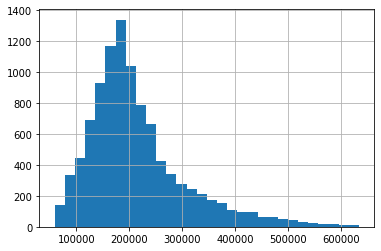

In [58]:
train_df['Price'].hist(bins=30)

In [59]:
train_df.columns.tolist()


['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [60]:
train_df.dtypes

DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear        float64
Ecology_1        float64
Social_1         float64
Social_2         float64
Social_3         float64
Healthcare_1     float64
Helthcare_2      float64
Shops_1          float64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [61]:
feture_ = ['DistrictId',
 'Rooms',
 'Square', 
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1', 
 'Social_1', 
 'Social_2', 
 'Social_3', 
 'Healthcare_1',
 'Helthcare_2', 
 'Shops_1', 
 'Ecology_2_A',
 'Ecology_2_B', 
 'Ecology_3_A',
 'Ecology_3_B', 
 'Shops_2_A',
 'Shops_2_B']



target_ = 'Price'

In [62]:
### Стандартизация признаков

In [63]:
train_df = train_df[feture_+[target_]]


In [64]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33.0,...,900.0,0.0,11.0,0,1,0,1,0,1,184966.930730
1,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46.0,...,240.0,1.0,16.0,0,1,0,1,0,1,300009.450063
2,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,34.0,...,229.0,1.0,3.0,0,1,0,1,0,1,220925.908524
3,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23.0,...,1084.0,0.0,5.0,0,1,0,1,0,1,175616.227217
4,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35.0,...,2078.0,2.0,4.0,0,1,0,1,0,1,150226.531644


# Определяем признаки для тестового массива

In [65]:
test_df = test_df[feture_]
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,11.0,...,1.0,900.0,0.0,0.0,0,1,0,1,0,1
1,74.0,2.0,69.263183,32.925087,1.0,7.0,1.0,1977.0,0.075779,6.0,...,3.0,900.0,0.0,2.0,0,1,0,1,0,1
2,190.0,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,30.0,...,87.0,4702.0,5.0,5.0,0,1,0,1,0,1
3,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,23.0,...,3.0,900.0,3.0,3.0,0,1,0,1,0,1
4,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,2.0,...,1.0,900.0,0.0,0.0,0,1,0,1,1,0


In [66]:
# feature_stand = train_df[feture_].select_dtypes(include = 'float64').columns.tolist()
feature_stand = train_df[feture_].select_dtypes(include = ['float64', 'uint8']).columns.tolist()
# feature_stand_T = testdf[feture].select_dtypes(include = ['float64', 'uint8']).columns.tolist()


In [67]:
feature_stand


['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

##### ПОВТОРЯЕМ ТО ЖЕ САМОЕ ДЛЯ ТЕСТОВОГО МАССИВА 


In [68]:
feature_stand_T = test_df[feture_].select_dtypes(include = ['float64', 'uint8']).columns.tolist()

In [69]:
feature_stand_T

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [70]:

scl =StandardScaler()
scl_f = scl.fit_transform(train_df[feature_stand])


In [71]:

train_df[feature_stand] = pd.DataFrame(scl_f, columns=feature_stand)

In [72]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,-0.353348,0.130439,-0.395780,-0.089070,-0.009569,-0.080132,-0.540526,-0.861908,-0.250529,0.474169,...,-0.169240,-0.883480,1.408356,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,184966.930730
1,-0.215687,1.321667,0.444867,0.049389,0.060460,-0.080132,-0.540526,-0.373187,-0.998053,1.215681,...,-1.053217,-0.213923,2.448700,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,300009.450063
2,0.059635,0.130439,-0.539842,-0.092270,-0.219657,0.127356,-0.094584,-0.916210,-0.581588,0.531208,...,-1.067950,-0.213923,-0.256195,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,220925.908524
3,0.174352,0.130439,-0.140699,0.214937,0.095474,0.127356,0.648652,-0.427489,2.680470,-0.096225,...,0.077202,-0.883480,0.159943,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,175616.227217
4,1.115034,-1.060788,-0.791473,-0.163040,0.025445,0.749818,-0.094584,-0.481792,-0.894969,0.588247,...,1.408526,0.455633,-0.048126,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,150226.531644


### ПОВТОРЯЕМ ТО ЖЕ САМОЕ ДЛЯ ТЕСТОВОГО МАССИВА

In [73]:
scl_T = scl.fit_transform(test_df[feature_stand_T])

In [74]:
test_df[feature_stand_T] = pd.DataFrame(scl_T, columns=feature_stand_T)

In [75]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0.152140,0.107333,-0.343979,-0.128993,0.002332,-0.292180,0.203631,-0.667299,1.585280,-0.794834,...,-0.304366,-0.168811,-0.891612,-0.888194,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666
1,0.514336,0.107333,0.671194,-0.160896,-0.500230,-0.089867,-1.724690,-0.398066,-0.367283,-1.080052,...,-0.220549,-0.168811,-0.891612,-0.469511,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666
2,3.140252,-1.085258,-2.244616,-1.227699,0.605406,-1.101431,-1.131360,-4.059632,-0.998468,0.288994,...,3.299785,4.791278,2.487242,0.158513,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666
3,-0.096869,0.107333,0.869374,1.034030,0.303869,2.944824,1.390289,1.217331,-0.149940,-0.110311,...,-0.220549,-0.168811,1.135700,-0.260169,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666
4,-0.549613,-1.085258,-0.467364,0.496553,-0.500230,1.933260,0.648628,1.755796,-0.397445,-1.308227,...,-0.304366,-0.168811,-0.891612,-0.888194,-0.098453,0.098453,-0.175258,0.175258,3.337053,-3.337053


Разбиение на train  и test

In [76]:
X = train_df[feture_]
# X = train_df[feature_stand]

y = train_df[target_]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
9254,0.174352,-1.060788,0.425282,0.346343,-0.184643,-0.910081,-1.729705,-0.427489,2.680470,-0.096225,...,-0.211458,0.077202,-0.883480,0.159943,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
1561,2.193376,0.130439,-0.533021,0.098563,-0.184643,-0.495106,0.797299,1.744603,0.985142,-0.495501,...,0.795647,-0.169240,1.125190,1.200287,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
1670,-1.041651,-1.060788,-1.037753,-0.204999,-0.044584,-0.910081,-1.135115,-1.350629,0.268528,-0.495501,...,-0.169496,2.165264,1.794746,0.159943,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
6087,0.908543,1.321667,0.266664,0.128715,-0.044584,-0.702594,-1.135115,-1.024815,1.228634,0.702326,...,-0.337347,1.219676,1.125190,-0.464264,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
6669,-1.133425,-1.060788,-0.647979,-0.045490,-0.184643,0.127356,0.648652,-0.427489,-0.938799,-1.351093,...,-0.337347,-0.169240,-0.883480,-0.672333,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864


In [77]:
# перед тем как запустить обученную модель на тест предсказания, необходимо проверить, 
# что массив для обучения и массив для предсказаний совпадают по столбцам
X_train.columns == test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Построение базовых моделей и выбор лучшей


Linear regression

In [78]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred_l = l_model.predict(X_train)

R2:	0.494
MAE:	45094.284
MSE:	4344757629.57


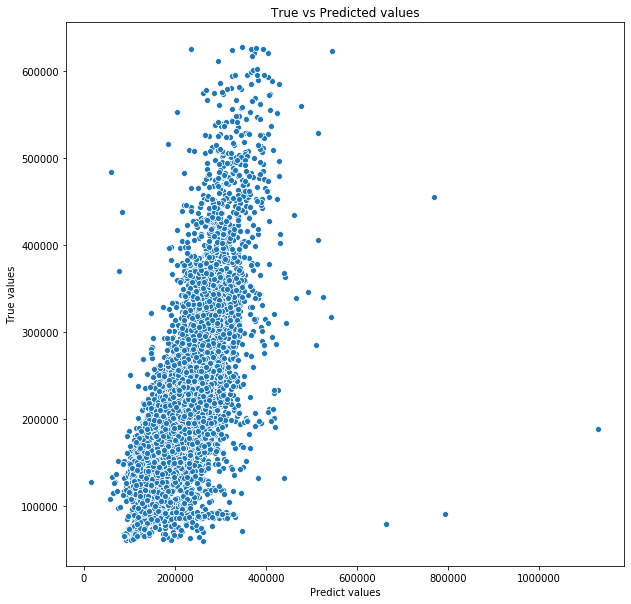

In [80]:
evaluate_preds(y_train, y_pred_l)

R2:	0.44
MAE:	45659.528
MSE:	4913066871.536


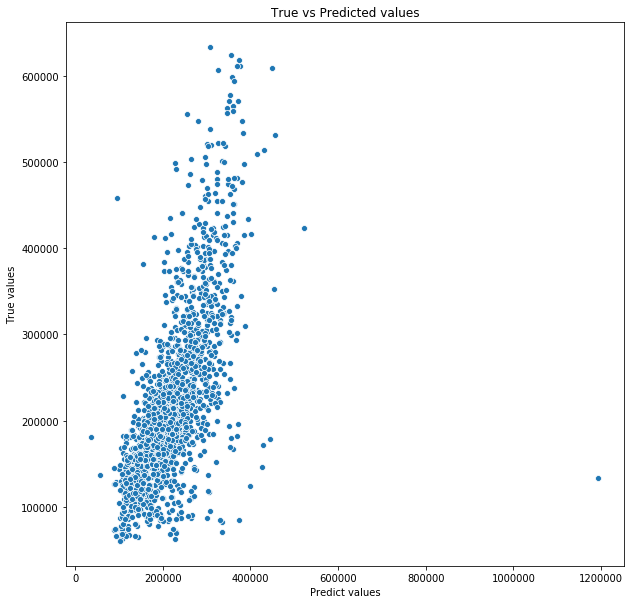

In [81]:
y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Random forest

In [82]:
l_model = RandomForestRegressor()
l_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R2:	0.949
MAE:	12003.658
MSE:	438200624.639


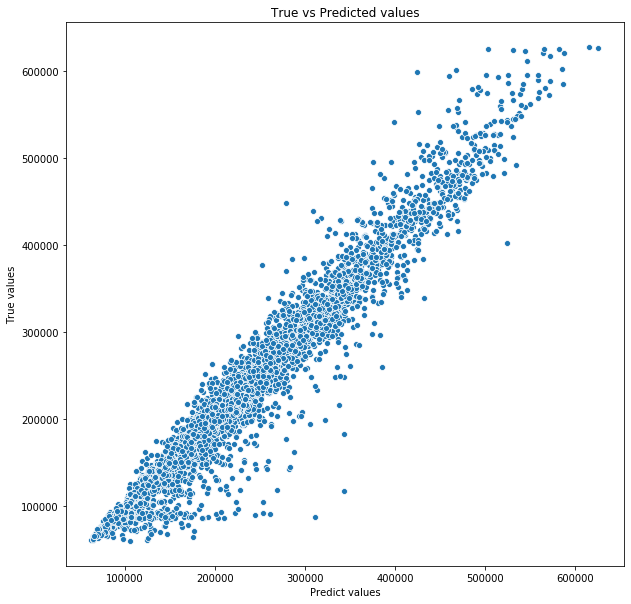

R2:	0.683
MAE:	30653.013
MSE:	2779187960.934


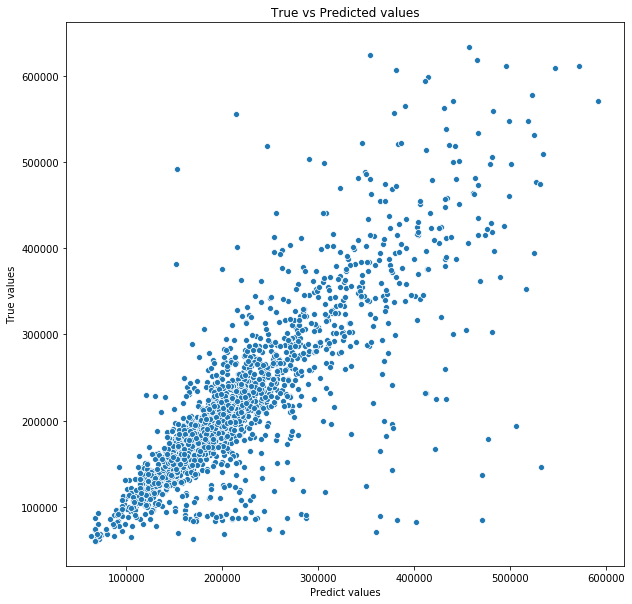

In [83]:
y_pred_l = l_model.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Gradient Boosting

In [84]:
l_model = GradientBoostingRegressor()
l_model.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.766
MAE:	28807.157
MSE:	2006584271.861


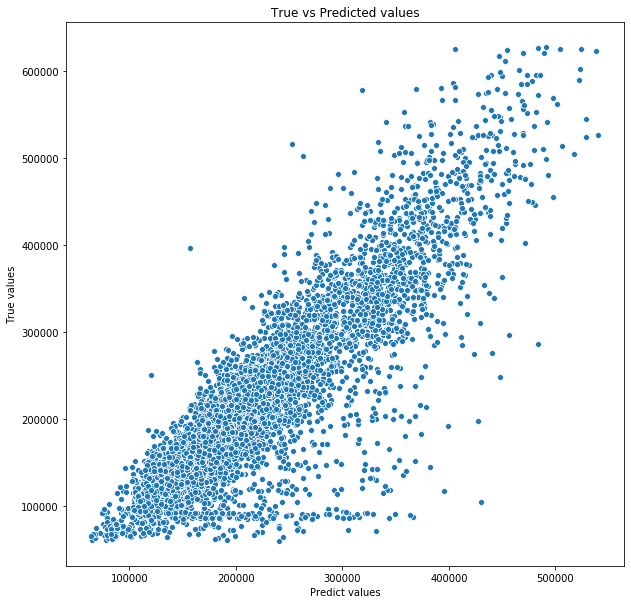

R2:	0.705
MAE:	30740.37
MSE:	2587137920.773


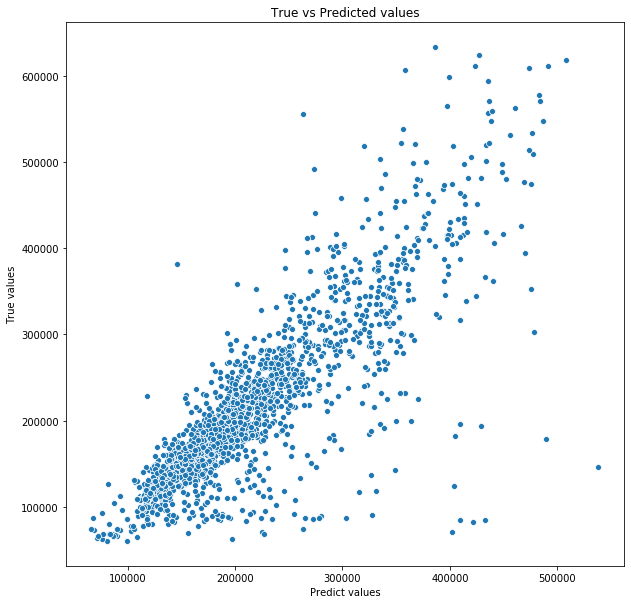

In [85]:
y_pred_l = l_model.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Настройка и оценка финальной модели

In [86]:
model = GradientBoostingRegressor(random_state=42, subsample=0.9, learning_rate=0.01)
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
param = {'n_estimators':[10,50,100,150,300], 'max_depth':[3,5,7,10]}

In [88]:
gd = GridSearchCV(model, param, scoring = 'r2', cv = KFold(n_splits=3, random_state=21))
gd.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                          

In [89]:
gd.best_params_



{'max_depth': 7, 'n_estimators': 300}

In [90]:
gd.best_score_

0.7218777457318869

In [91]:
model_best= GradientBoostingRegressor(random_state=42, n_estimators = 300, max_depth=7)
model_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.977
MAE:	9842.131
MSE:	193553617.712


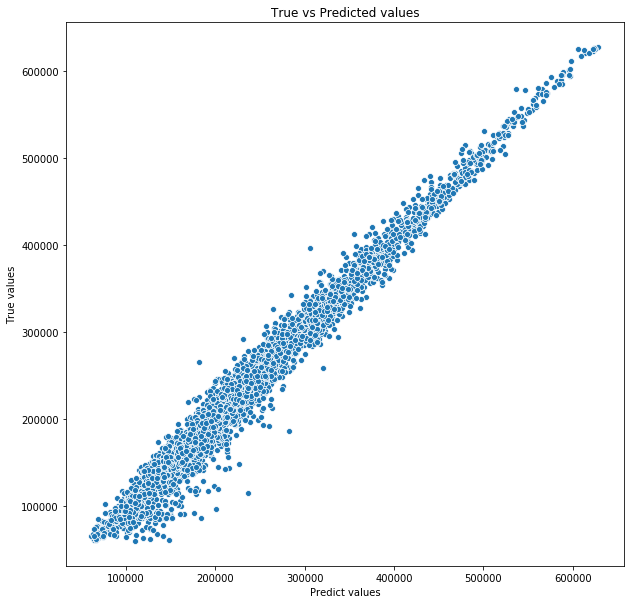

R2:	0.723
MAE:	28061.71
MSE:	2434261515.386


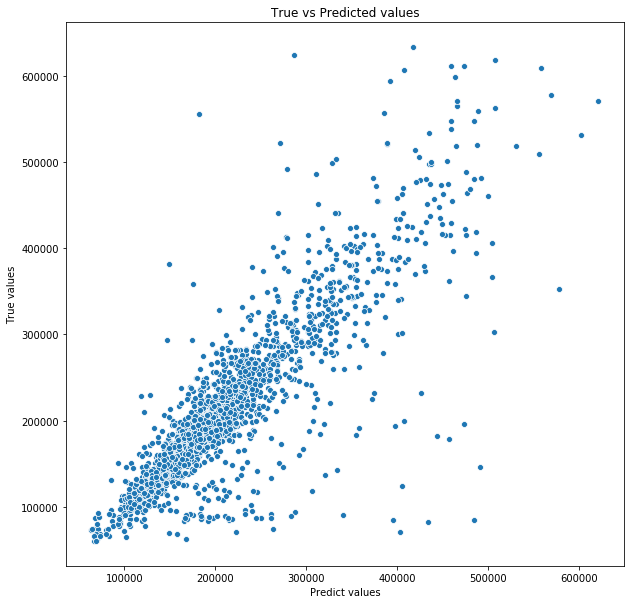

In [92]:
y_pred_l = model_best.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = model_best.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

In [93]:
model_best.feature_importances_

array([4.79074841e-02, 7.42946369e-02, 3.96378739e-01, 3.53084785e-02,
       2.28955015e-02, 1.99511030e-02, 1.99350804e-02, 3.75589757e-02,
       4.35126410e-02, 7.76649742e-02, 1.10914172e-01, 6.67543011e-02,
       2.47890707e-02, 5.69299644e-03, 1.31696521e-02, 1.57178017e-04,
       4.87139180e-04, 7.35033237e-04, 6.88695088e-04, 7.02520424e-04,
       5.01628128e-04])

# III. Заготовка под тестирование на базе трейна тест выборки

In [94]:
y_pred = model_best.predict(test_df)

In [95]:
y_pred.size

5000

In [96]:
# для 5000 домов из выборки
test_df.shape

(5000, 21)

In [97]:
# результат записываем в файл, который надо отправить преподавателю
submit = pd.DataFrame(list(zip(test_df.index,y_pred)), columns = ['Id', 'Predicted_price'])
print(submit.head())

submit.to_csv('2Кornienko_Irina_predictions.csv', sep=',', index=False)

   Id  Predicted_price
0   0    160553.685082
1   1    242846.238690
2   2    273046.670601
3   3    397225.404879
4   4    140363.379103


Важность признаков

Сохранение модели

In [98]:
#### Scaler
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scl, file)

In [99]:
#### Model
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(model_best, file)